# Exam 06/02/2023  

## Alberto Eusebio (cod. pers: 10970712)

In [2]:
# plotting
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import jax.numpy as jnp
import jax

# scientific computing
import numpy as np
import pandas as pd

## Exercise 01

(400, 400)
(400, 400)
Error:  0.00233163147914387


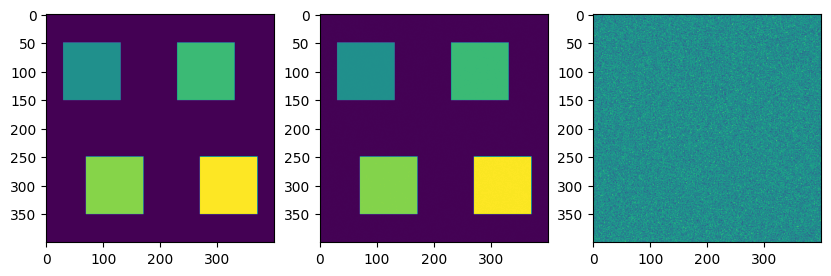

In [118]:
N = 400

X = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        if(50<=i<=150 and 30<=j<=130):
            X[i, j] = 110
        elif(50 <= i <= 150 and 230 <= j <= 330):
            X[i, j] = 150
        elif(250 <= i <= 350 and 70 <= j <= 170):
            X[i, j] = 180
        elif(250 <= i <= 350, 270 <= j <= 370):
            X[i, j] = 220

Noise = 0.2 * np.random.normal(0, 1, (N, N)) # the noise is very low

X_noisy = X + Noise


print(X.shape)
print(Noise.shape)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(X)
ax[1].imshow(X_noisy)
ax[2].imshow(Noise)

print("Error: ", np.linalg.norm(X-X_noisy, "fro")/np.linalg.norm(X, "fro"))

In [116]:
def svt(X, threshold, tollerance,  mask_keep, n_max_iter= 1000, X_true = None):
    A = X.copy() # create a copy of the input matrix that we will modify
    A[np.logical_not(mask_keep)] = 0 # set to zero the unknown values

    for i in range(n_max_iter):
        A_old = A.copy()
        U,s,VT = np.linalg.svd(A, full_matrices = False)

        # threshold the singular values
        s[s < threshold] = 0
        A = U @ np.diag(s) @ VT # reconstruct the matrix

        A[mask_keep] = X[mask_keep] # impose the known values
        increment = np.linalg.norm(A - A_old, "fro") # compute the increment

        # check if the increment is smaller than the tollerance
        if increment < tollerance:
            return A
    return A

202
202
202
202
202
0.0011852240566423144


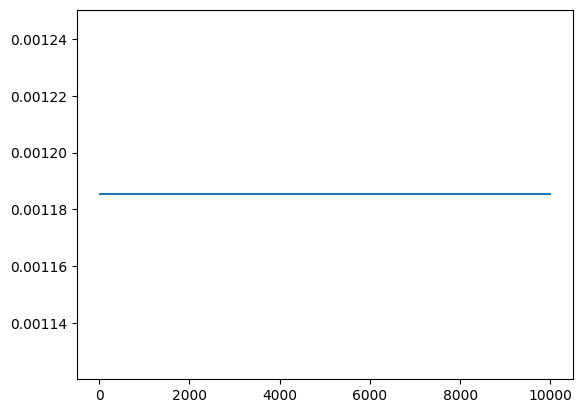

In [117]:
n_max_iter = 50
threshold  = 100.0
increment_tol = 1e-6
mask_keep = X > 0 # we tell the algorithm which values are known
####################

tr = [10, 100, 200, 300, 10000]

error_list = []

for t in tr: 
    X_hat = svt(X_noisy, t, increment_tol, mask_keep, n_max_iter)
    print(np.linalg.matrix_rank(X_hat))
    error = np.linalg.norm(X - X_hat, "fro") / np.linalg.norm(X, "fro")
    error_list.append(error)

print(error_list[-1])
plt.plot(tr, error_list)

Error:  0.39847296660354053
Error:  0.00023694667271890739
K:  3


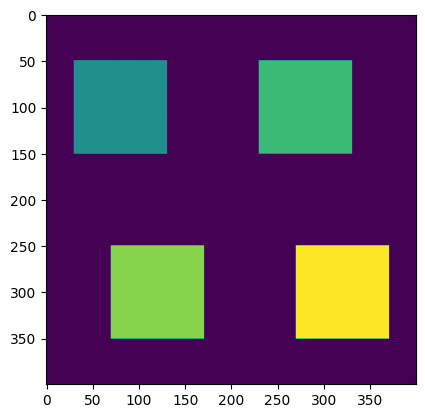

In [120]:
U, s, VT = np.linalg.svd(X_noisy, full_matrices = False)

error = 1.0
error_goal = error_list[-1]
k = 1

while error_goal <= error:
    X_hat2 = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    error = np.linalg.norm(X - X_hat2, "fro") / np.linalg.norm(X, "fro")
    print("Error: ", error)
    k += 1

print("K: ", k)

X_hat2 = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
plt.imshow(X_hat2)

The SVT algorithm is closer to the rank of the original matrix, while the SVD and the lower rank approximation shows that it is sufficient to store a rank-3 approximation of the matrix to obtain the same image

In [121]:
def randomized_SVD(A, k):
  n, m = A.shape[0], A.shape[1]
  P = np.random.randn(m, k) # generate a random matrix of size (m,k)
  #print(P.shape)
  #print(np.mean(P, axis=(0, 1)), np.std(P, axis=(0, 1)))
  Z = A @ P
  #print(Z.shape)
  Q, R = np.linalg.qr(Z)
  #print(Q.shape, R.shape)
  Y = Q.T @ A
  #print(Y.shape)
  U_Y, s, VT = np.linalg.svd(Y, full_matrices = False)
  U = Q @ U_Y
  #print(U.shape, s.shape, VT.shape)
  return U, s, VT


Error:  0.4102372594104467
Error:  0.003852766065532806
Error:  0.0036468203077185653
Error:  0.0026544552324979337
Error:  0.0018607072166722468
Error:  0.001461913997655612
Error:  0.0016104302249539632
Error:  0.001532699716919274
Error:  0.0010310137205785939
K:  10


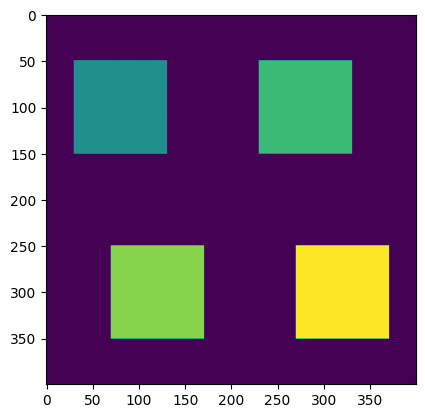

In [123]:
error = 1.0
error_goal = error_list[-1]
k = 1

while error_goal < error:
    U_k, s_k, VT_k = randomized_SVD(X_noisy, k)
    X_hat3 = U_k @ np.diag(s_k) @ VT_k
    error = np.linalg.norm(X - X_hat3, "fro") / np.linalg.norm(X, "fro")
    print("Error: ", error)
    k += 1

print("K: ", k)

X_hat3 = randomized_SVD(X_noisy, k)
plt.imshow(X_hat2)

The Randomized SVD algorithm is fast, but the output is an approximation(even though quite decent) of the real SVD algorithm.

Sometimes adding an oversampling factor of 1.5 may increase the performance of the approximation

## Exercise 02

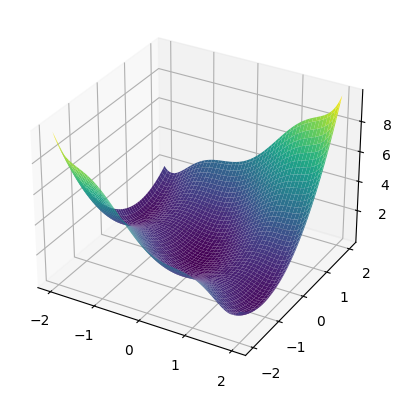

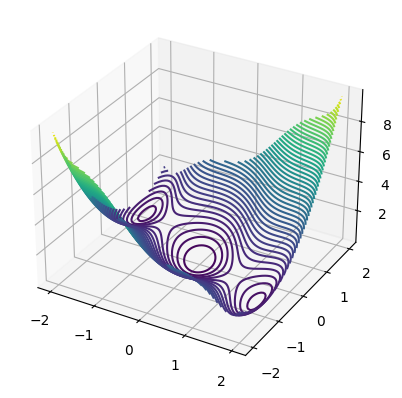

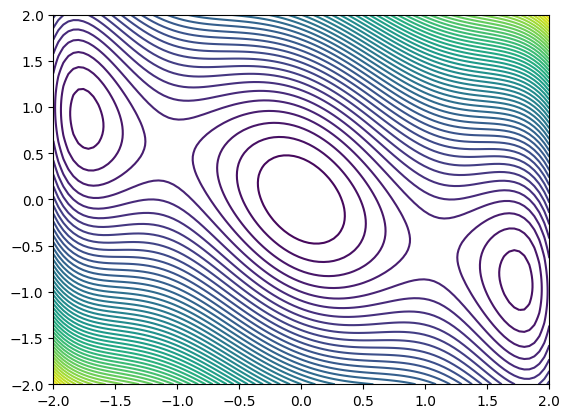

In [97]:
f = lambda x, y: 2 * x**2 - 1.05 * x**4 + x**6 / 6 + x * y + y**2 # the function to plot

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.contour3D(X, Y, Z, 50, cmap='viridis')

fig = plt.figure()
ax3 = fig.add_subplot(111)

ax3.contour(X, Y, Z, 50, cmap='viridis')

In [60]:
print(f(0, 0))
print(f(1.74, -0.783))
print(f(-1.74, 0.783))
print(f(1.07, -0.53))
print(f(-1.07, 0.53))

0.0
0.30653529609600105
0.30653529609600105
0.8773859148081664
0.8773859148081664


In [71]:
def f(x):
    return 2 * x[0]**2 - 1.05 * x[0]**4 + x[0]**6 / 6 + x[0] * x[1] + x[1]**2 # the function to plot

In [95]:
import jax
import jax.numpy as jnp

num_epochs = 100
eps = 1e-6

def newton_method(f, hessian, gradient, x_guess):
    x = x_guess.copy()

    history = []
    for epoch in range(num_epochs):
        l = f(x)
        history.append((x,l))
        
        H = hessian(x)
        G = gradient(x)

        incr = np.linalg.solve(H, -G)
        x += incr

        # print('============ epoch %d' % epoch)
        # print('loss: %1.3e' % l)
        # print('grad: %1.3e' % np.linalg.norm(G))
        # print('incr: %1.3e' % np.linalg.norm(incr))

        if np.linalg.norm(incr) < eps:
            break
    
    return history

In [96]:
f_jit = jax.jit(f)
gradient = jax.grad(f_jit)
hessian = jax.hessian(f_jit)

x_guess = [jnp.array([2.5, -2.5]), jnp.array([0.8, -2.5]), jnp.array([-0.4, -2.5])]  # initial guesses random

for x0 in x_guess:
    history = newton_method(f_jit, hessian, gradient, x0)
    print("Local stationary found at ", history[-1][0], " with value ", history[-1][1])

Local stationary found at  [ 1.747552 -0.873776]  with value  0.29863876
Local stationary found at  [ 1.0705422 -0.5352711]  with value  0.87736166
Local stationary found at  [-3.585592e-08  1.792796e-08]  with value  2.2498821e-15


The values are pretty close to the one I have found and this is no surprise. There is no point exactly at x = [0, 0], but it is clear that it is due to approximation errors and the limited amount of iterations. The computed image is around machine precision.

## Exercise 3

In [100]:
A = np.array([[3, 6], [0, 1], [4, 8]])
Q, R = np.linalg.qr(A)

print(Q)
print(R)

print(np.linalg.norm(A - Q @ R, "fro"))

[[-0.6  0. ]
 [-0.   1. ]
 [-0.8  0. ]]
[[ -5. -10.]
 [  0.   1.]]
9.930136612989092e-16


In [102]:
Q = np.array([[0.6, 0], [0, 1], [0.8, 0]])
R = np.array([[5, 10], [0, 1]])

print(np.linalg.norm(A - Q @ R, "fro"))

# The projection matrix is given by P = Q @ Q.T
P = Q @ Q.T

print(P)

0.0
[[0.36 0.   0.48]
 [0.   1.   0.  ]
 [0.48 0.   0.64]]


In [111]:
b = np.array([1, 1, 0]).T
c = np.array([3, 1, 4]).T

# The projection of b and c onto the column space of A is given by P @ b and P @ c
# the norm of b is not equal to the norm of P @ b so b is not in the column space of A
print(np.linalg.norm(P @ b))
print(np.linalg.norm(b))

# the norm of c is equal to the norm of P @ c so c is in the column space of A
print(np.linalg.norm(P @ c))
print(np.linalg.norm(c))

1.16619037896906
1.4142135623730951
5.0990195135927845
5.0990195135927845


In [114]:
# The best-fit solution to the system Ax = b is given by
# the solution to the system Rx = Q.T @ b


Q, R = np.linalg.qr(A.T)
c = np.array([2, 2]).T

print(R)
print(Q)
print(Q.T @ c)

[[-6.70820393e+00 -8.94427191e-01 -8.94427191e+00]
 [ 0.00000000e+00  4.47213595e-01  4.65376563e-16]]
[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
[-2.68328157 -0.89442719]
